In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.utils import to_categorical

In [3]:
mnist=pd.read_csv('D:\\Machine learning\\mnist_784.csv')

In [4]:
mnist.shape

(70000, 785)

In [5]:
train_images=mnist.iloc[:60000,:-1].values
train_labels=mnist.iloc[:60000,-1].values


train_images=train_images.reshape(60000,28,28)


print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [6]:
test_images=mnist.iloc[60000:,:-1].values
test_labels=mnist.iloc[60000:,-1].values

test_images=test_images.reshape(10000,28,28)

print(test_images.shape)
print(test_labels.shape)


(10000, 28, 28)
(10000,)


In [7]:
#for online taking dataset

#train_images=mnist.train_images()
#train_labels=mnist.train_labels()

#print(train_images.shape)


#test_images=mnist.test_images()
#test_labels=mnist.test_labels()
#print(test_images.shape)

In [8]:
print(test_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

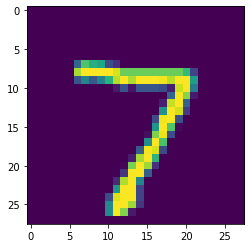

In [9]:
plt.imshow(test_images[0])

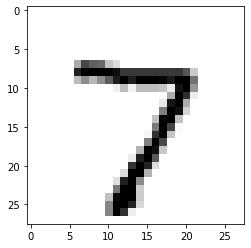

In [10]:
plt.imshow(test_images[0],cmap=plt.cm.binary)  #binary image

In [11]:
#feature scaling
#as max value is 255
train_images=(train_images/255)
test_images=(test_images/255)

# flatten the images

In [12]:
train_images=train_images.reshape((-1,784))   #one vector only 28*28 all pixels stored in one row
test_images=test_images.reshape((-1,784))
#-1 means left shape will be there like total elements are 40 if (-1,8) the in place of -1 will be 5 automaticaally or there are 5 rows

In [13]:
print(train_images.shape)

(60000, 784)


# creating a empty neural network

In [14]:
model=Sequential()

In [15]:
model.add(Dense(64,input_dim=784))  #first layer giving 64 inputs and given dim will be by default in new layers also
model.add(Activation('relu'))

model.add(Dense(64))  #2nd layer
model.add(Activation('relu'))

model.add(Dense(10))   #output layer  10 as a output bcoz we have 10 labels
model.add(Activation('softmax'))



In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#optimizer used to optimize learning rate which is used in correcting weight values
#by using loss we are caluculating error
#metrics used to find the accuracy of model
#all are neccessory parameters

In [28]:
train_images.shape

(60000, 784)

In [29]:


model.fit(train_images,to_categorical(train_labels),epochs=5,batch_size=32,)

#1 epoch is one forward+backword  
#in one epoch all images passed using batch size (is 32 means at one instant 32 randomly images passed in training)
#32*1875 is 60k

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9921
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0173 - accuracy: 0.9944
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0171 - accuracy: 0.9939


In [19]:
model.evaluate(test_images,to_categorical(test_labels))

313/313 [==============================] - 1s 1ms/step - loss: 0.0904 - accuracy: 0.9715


[0.09035661816596985, 0.9714999794960022]

In [20]:
model.save_weights('929model.h5')

# using these weights

In [21]:
model.load_weights('929model.h5')


In [22]:
pred=model.predict(test_images[:10])

In [23]:
pred[0]  #probability of 0,1,2,3,4,5,..columns .digits 


array([3.9952474e-07, 5.4322793e-08, 4.8790747e-07, 7.4499178e-05,
       4.5071173e-12, 1.2439344e-07, 1.5317075e-15, 9.9989998e-01,
       2.9346384e-07, 2.4208704e-05], dtype=float32)

In [24]:
print(np.argmax(pred ,axis=1)) #returns which column is max

[7 2 1 0 4 1 4 9 5 9]


In [25]:
print(test_labels[:10])

[7 2 1 0 4 1 4 9 5 9]
